In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from IPython.display import display
from PIL import Image
from tensorflow.keras.losses import categorical_crossentropy
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import numpy as np
import cv2 as cv

# Providing dataset path

In [2]:
path = "/Users/kaushalkharkwal/Desktop/project_2021/AI_HIproject/COVID-19_Radiography_Dataset"
labels = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

In [3]:
image_size = 256

labels = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

def create_training_data(paths):
    
    images = []
    
    for label in labels:
        dir = os.path.join(paths,label)
        class_num = labels.index(label)
        
        for image in os.listdir(dir):
            image_read = cv.imread(os.path.join(dir,image))
            image_resized = cv.resize(image_read,(image_size,image_size),cv.IMREAD_GRAYSCALE)
            images.append([image_resized,class_num])
            
    return np.array(images)

In [4]:
train = create_training_data(path)
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)
    
X= np.array(X)
y = np.array(y)
y = np.expand_dims(y, axis=1)



<ipython-input-3-05c8b1ef997e>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(images)


In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 32, stratify=y)

Number of COVID images = 2893
Number of Normal images = 8154
Number of Lung_Opacity images = 4809
Number of Viral Pneumonia images = 1076


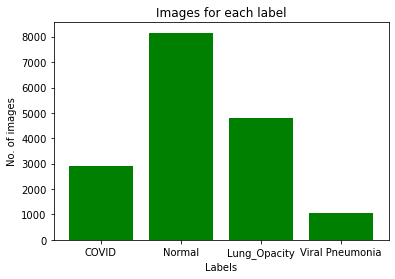

In [6]:

a = 0
b = 0
c = 0
d= 0

for label in y_train:
    if label == 0:
        a += 1
    if label == 1:
        b += 1
    if label == 2:
        c += 1
    if label == 3:
        d += 1
        
        
print (f'Number of COVID images = {a}')
print (f'Number of Normal images = {b}')
print (f'Number of Lung_Opacity images = {c}')
print (f'Number of Viral Pneumonia images = {d}')

# plotting the data

xe = [i for i, _ in enumerate(labels)]

numbers = [a,b,c,d]
plt.bar(xe,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(xe, labels)

plt.show()


In [7]:

difference_covid = c-a
difference_Viral_Pneumonia =c-d


In [8]:
#Solving the imbalance
def rotate_images(image, scale =1.0, h=256, w = 256):
    
    center = (h/2,w/2)
    
    angle = random.randint(-25,25)
    M = cv.getRotationMatrix2D(center, angle, scale)
    rotated = cv.warpAffine(image, M, (h,w))
    return rotated




In [9]:
def flip (image):
    
    flipped = np.fliplr(image)
    return flipped




In [10]:
def translation (image):
    
    x= random.randint(-50,50)
    y = random.randint(-50,50)
    rows,cols,z = image.shape
    M = np.float32([[1,0,x],[0,1,y]])
    translate = cv.warpAffine(image,M,(cols,rows))
    
    return translate


In [11]:
def blur (image):
    
    x = random.randrange(1,5,2)
    blur = cv.GaussianBlur(image,(x,x),cv.BORDER_DEFAULT)
    return blur




In [12]:
def apply_aug (image):
    
    number = random.randint(1,4)
    
    if number == 1:
        image= rotate_images(image, scale =1.0, h=256, w = 256)
            
    if number == 2:
        image= flip(image)
                
    if number ==3:
        image= translation(image)
                
    if number ==4:
        image= blur(image)
    
    return image

(1916, 256, 256, 3)
(1916,)
(1076, 256, 256, 3)
(1076,)
(19924, 256, 256, 3)
(19924,)
Number of COVID images = 4809
Number of Normal images = 8154
Number of Lung_Opacity images = 4809
Number of Viral Pneumonia images = 2152


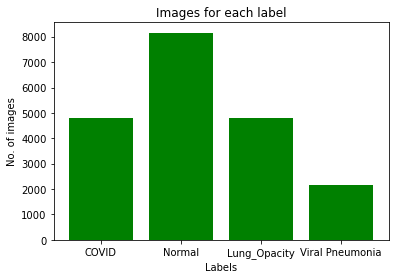

In [13]:

def oversample_images (difference_covid,difference_Viral_Pneumonia, X_train, y_train):
    
    covid_counter = 0

    Viral_Pneumonia_counter=0
    
    new_covid = []
 
    new_Viral_Pneumonia = []
    
    label_covid = []

    label_Viral_Pneumonia= []
    
    
    for i,item in enumerate (X_train):
        
        if  y_train[i] == 0 and covid_counter < difference_covid:
            
            image = apply_aug(item)
            
            covid_counter = covid_counter+1
            label = 0
            
            new_covid.append(image)
            label_covid.append(label)
                   
            
        if  y_train[i] == 3 and Viral_Pneumonia_counter < difference_Viral_Pneumonia:
            
            image = apply_aug(item)
            
            Viral_Pneumonia_counter = Viral_Pneumonia_counter+1
            label =3
            
            new_Viral_Pneumonia.append(image)
            label_Viral_Pneumonia.append(label)
            
    
    new_covid = np.array( new_covid)
    label_covid = np.array(label_covid )
    new_Viral_Pneumonia = np.array(new_Viral_Pneumonia)
    label_Viral_Pneumonia = np.array(label_Viral_Pneumonia)
    
    return new_covid,label_covid, new_Viral_Pneumonia, label_Viral_Pneumonia

cov_images,cov_labels,Viral_images,Viral_labels = oversample_images(difference_covid,difference_Viral_Pneumonia, X_train, y_train)
#oversample_images(difference_covid, difference_Lung_Opacity,difference_Viral_Pneumonia, X_train, y_train)
print(cov_images.shape)
print(cov_labels.shape)

print(Viral_images.shape)
print(Viral_labels.shape)
labels_= np.append(cov_labels,Viral_labels)
y_new_labels = np.expand_dims(labels_, axis=1)

x_new_images = np.append(cov_images,Viral_images,axis =0)

X_train1 = np.append(X_train,x_new_images,axis=0)
y_train1 = np.append(y_train,y_new_labels)

print(X_train1.shape)
print(y_train1.shape)

a1 = 0
b1 = 0
c1 = 0
d1= 0

for label in y_train1:
    if label == 0:
        a1 += 1
    if label == 1:
        b1 += 1
    if label == 2:
        c1 += 1
    if label == 3:
        d1 += 1
        
        
print (f'Number of COVID images = {a1}')
print (f'Number of Normal images = {b1}')
print (f'Number of Lung_Opacity images = {c1}')
print (f'Number of Viral Pneumonia images = {d1}')

# plotting the data

xe = [i for i, _ in enumerate(labels)]

numbers = [a1,b1,c1,d1]
plt.bar(xe,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(xe, labels)

plt.show()

(3345, 256, 256, 3)
(3345,)
(3345, 256, 256, 3)
(3345,)
(2152, 256, 256, 3)
(2152,)
(28766, 256, 256, 3)
(28766,)
Number of Normal images = 8154
Number of COVID images =  8154
Number of Lung_Opacity images = 8154
Number of Viral Pneumonia images = 4304


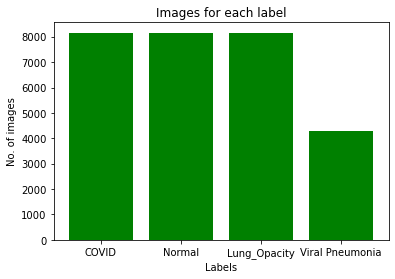

In [14]:
difference_covid1 = b1-a1
difference_Lung_Opacity1 = b1-c1
difference_Viral_Pneumonia1 = b1-d1
def oversample_images (difference_covid1, difference_Lung_Opacity1,difference_Viral_Pneumonia1, X_train1, y_train1):
    
    covid_counter1 = 0
    Lung_Opacity_counter1= 0
    Viral_Pneumonia_counter1=0
    
    new_covid1 = []
    new_Lung_Opacity1 = []
    new_Viral_Pneumonia1 = []
    
    label_covid1 = []
    label_Lung_Opacity1= []
    label_Viral_Pneumonia1= []
    
    
    for i,item in enumerate (X_train1):
        
        if  y_train1[i] == 0 and covid_counter1 < difference_covid1:
            
            image = apply_aug(item)
            
            covid_counter1 = covid_counter1+1
            label = 0
            
            new_covid1.append(image)
            label_covid1.append(label)
            
    
        if  y_train1[i] == 2 and   Lung_Opacity_counter1 < difference_Lung_Opacity1:
            
            image = apply_aug(item)
            
            Lung_Opacity_counter1 =    Lung_Opacity_counter1+1
            label =2
            
            new_Lung_Opacity1.append(image)
            label_Lung_Opacity1.append(label)
    
       
            
        if  y_train1[i] == 3 and Viral_Pneumonia_counter1 < difference_Viral_Pneumonia1:
            
            image = apply_aug(item)
            
            Viral_Pneumonia_counter1 = Viral_Pneumonia_counter1+1
            label =3
            
            new_Viral_Pneumonia1.append(image)
            label_Viral_Pneumonia1.append(label)
            
    
    new_covid1 = np.array( new_covid1)
    label_covid1 = np.array(label_covid1 )
    new_Lung_Opacity1= np.array( new_Lung_Opacity1)
    label_Lung_Opacity1 = np.array(label_Lung_Opacity1)
    new_Viral_Pneumonia1 = np.array(new_Viral_Pneumonia1 )
    label_Viral_Pneumonia1 = np.array(label_Viral_Pneumonia1)
    
    return new_covid1,label_covid1, new_Lung_Opacity1, label_Lung_Opacity1, new_Viral_Pneumonia1, label_Viral_Pneumonia1


cov_images1,cov_labels1,lung_images1,lung_labels1,Viral_images1,Viral_labels1 = oversample_images(difference_covid1, difference_Lung_Opacity1,difference_Viral_Pneumonia1, X_train1, y_train1)
#oversample_images(difference_covid, difference_Lung_Opacity,difference_Viral_Pneumonia, X_train, y_train)
print(cov_images1.shape)
print(cov_labels1.shape)
print(lung_images1.shape)
print(lung_labels1.shape)
print(Viral_images1.shape)
print(Viral_labels1.shape)
labels_1= np.append(cov_labels1,lung_labels1)
new_labels1 = np.append(labels_1,Viral_labels1)
y_new_labels1 = np.expand_dims(new_labels1, axis=1)

new_images_1 = np.append(cov_images1,lung_images1,axis =0)
x_new_images1 = np.append(new_images_1,Viral_images1,axis =0)


X_train2 = np.append(X_train1,x_new_images1,axis=0)
y_train2 = np.append(y_train1,y_new_labels1)

print(X_train2.shape)
print(y_train2.shape)


Bal_COVID =0
Bal_Normal =0
Bal_Lung_Opacity=0
Bal_Viral_Pneumonia=0

for i in y_train2:
    
    if i==0:
        Bal_COVID = Bal_COVID+1
    elif i==1 :
        Bal_Normal = Bal_Normal+1
    elif i==2 :  
        Bal_Lung_Opacity= Bal_Lung_Opacity+1
    else:
        Bal_Viral_Pneumonia=Bal_Viral_Pneumonia+1    
        
print ('Number of Normal images =',Bal_Normal)
print ('Number of COVID images = ',Bal_COVID)
print ('Number of Lung_Opacity images =', Bal_Lung_Opacity)
print ('Number of Viral Pneumonia images =',Bal_Viral_Pneumonia)


# plotting the data

xe = [i for i, _ in enumerate(labels)]

numbers = [Bal_COVID, Bal_Normal,Bal_Lung_Opacity, Bal_Viral_Pneumonia]
plt.bar(xe,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(xe, labels)

plt.show()

Number of COVID images = 8154
Number of Normal images = 8154
Number of Lung_Opacity images = 8154
Number of Viral Pneumonia images = 4304
(3850, 256, 256, 3)
(3850,)
(32616, 256, 256, 3)
(32616,)
Number of Normal images = 8154
Number of COVID images =  8154
Number of Lung_Opacity images = 8154
Number of Viral Pneumonia images = 8154


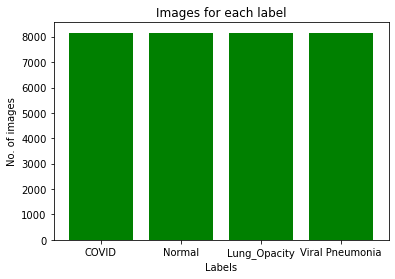

In [15]:
a2 = 0
b2 = 0
c2 = 0
d2= 0

for label in y_train2:
    if label == 0:
        a2 += 1
    if label == 1:
        b2 += 1
    if label == 2:
        c2 += 1
    if label == 3:
        d2 += 1
        
        
print (f'Number of COVID images = {a2}')
print (f'Number of Normal images = {b2}')
print (f'Number of Lung_Opacity images = {c2}')
print (f'Number of Viral Pneumonia images = {d2}')


difference_Viral_Pneumonia_ = a2-d2
def oversample_images (difference_Viral_Pneumonia_, X_train2, y_train2):
    


    Viral_Pneumonia_counter_=0

 
    new_Viral_Pneumonia_ = []
    

    label_Viral_Pneumonia_= []
    
    
    for i,item in enumerate (X_train2):   
        if  y_train2[i] == 3 and Viral_Pneumonia_counter_ < difference_Viral_Pneumonia_:
            
            image = apply_aug(item)
            
            Viral_Pneumonia_counter_ = Viral_Pneumonia_counter_+1
            label =3
            
            new_Viral_Pneumonia_.append(image)
            label_Viral_Pneumonia_.append(label)
            
    new_Viral_Pneumonia_ = np.array(new_Viral_Pneumonia_)
    label_Viral_Pneumonia_ = np.array(label_Viral_Pneumonia_)
    
    return new_Viral_Pneumonia_, label_Viral_Pneumonia_

Viral_images_,Viral_labels_ = oversample_images(difference_Viral_Pneumonia_, X_train2, y_train2)
#oversample_images(difference_covid, difference_Lung_Opacity,difference_Viral_Pneumonia, X_train, y_train)

print(Viral_images_.shape)
print(Viral_labels_.shape)

X_train3 = np.append(X_train2,Viral_images_,axis=0)
y_train3 = np.append(y_train2,Viral_labels_)

print(X_train3.shape)
print(y_train3.shape)

Bal_COVID =0
Bal_Normal =0
Bal_Lung_Opacity=0
Bal_Viral_Pneumonia=0

for i in y_train3:
    
    if i==0:
        Bal_COVID = Bal_COVID+1
    elif i==1 :
        Bal_Normal = Bal_Normal+1
    elif i==2 :  
        Bal_Lung_Opacity= Bal_Lung_Opacity+1
    else:
        Bal_Viral_Pneumonia=Bal_Viral_Pneumonia+1    
        
print ('Number of Normal images =',Bal_Normal)
print ('Number of COVID images = ',Bal_COVID)
print ('Number of Lung_Opacity images =', Bal_Lung_Opacity)
print ('Number of Viral Pneumonia images =',Bal_Viral_Pneumonia)


# plotting the data

xe = [i for i, _ in enumerate(labels)]

numbers = [Bal_COVID, Bal_Normal,Bal_Lung_Opacity, Bal_Viral_Pneumonia]
plt.bar(xe,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(xe, labels)

plt.show()

Display Random Images


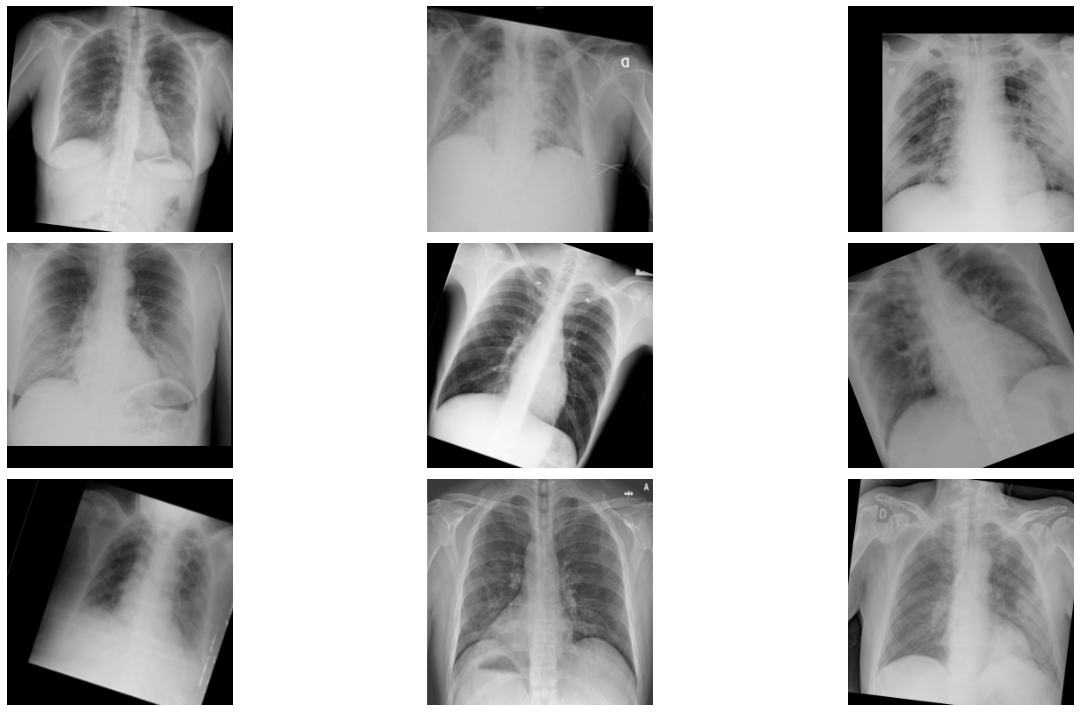

In [16]:
# Extract 9 random images
print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

for i in range(9):
    num = random.randint(0,len(cov_images)-1)
    plt.subplot(3, 3, i + 1)
    
    plt.imshow(cov_images[num],cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.models import Sequential
from IPython.display import display
from PIL import Image
from tensorflow.keras.losses import categorical_crossentropy
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
import numpy as np
import cv2
from keras.optimizers import SGD
from keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [18]:

y_train3= to_categorical(y_train3)

In [19]:
model2=Sequential()

model2.add(Conv2D(32,(3,3),input_shape=(256,256,3),padding='same',activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(BatchNormalization())
model2.add(Dropout(0.75))


model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(BatchNormalization())
model2.add(Dropout(0.75))


model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.75))

model2.add(Dense(4, activation='softmax'))

model2.summary()
model2.compile(optimizer='rmsprop',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 127, 127, 64)      256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 64)      0